## 移动窗口函数mean(一次移动平均)

<font color='red' size=4>公式:</font>

&emsp;&emsp;设时间序列为$x_{1},x_{2},...$移动平均法可表示为:

$$ F_{t+1}=(x_{t},x_{t-1}+...+x_{t-N+1})/N=\frac{1}{N} \sum_{t-N+1}^{t}x_{i} $$

式中:$x_{i}$为最新观察值,$F_{t+1}$为下一期预测值

&emsp;&emsp;由移动平均法计算公式可以看出,每一新预测值是对前一移动平均预测值的修正,$N$越大平滑效果愈好

In [45]:
import  pandas as pd

In [46]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [47]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [48]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [49]:
close_px = close_px.resample('B').ffill() # 按照工作日频率进行重新采样
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


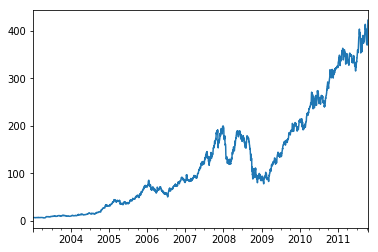

In [50]:
close_px.AAPL.plot()

In [51]:
# 5个连续值(从当前值向前推4个,共计5个值)的平均值
close_px.AAPL.rolling(5).mean() # window=5,N=4

2003-01-02        NaN
2003-01-03        NaN
2003-01-06        NaN
2003-01-07        NaN
2003-01-08      7.402
               ...   
2011-10-10    377.346
2011-10-11    382.904
2011-10-12    387.692
2011-10-13    393.904
2011-10-14    404.344
Freq: B, Name: AAPL, Length: 2292, dtype: float64

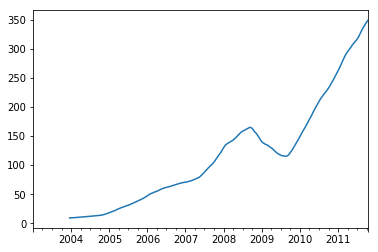

In [52]:
close_px.AAPL.rolling(250).mean().plot() # N=249

In [53]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=3).mean() # min_periods必须小于window
'''
min_periods : int, default None
    Minimum number of observations in window required to have a value (otherwise result is NA).
    For a window that is specified by an offset, min_periods will default to 1. Otherwise, 
    min_periods will default to the size of the window.
'''
appl_std250[0:14]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06    7.433333
2003-01-07    7.432500
2003-01-08    7.402000
2003-01-09    7.391667
2003-01-10    7.387143
2003-01-13    7.378750
2003-01-14    7.370000
2003-01-15    7.355000
2003-01-16    7.350909
2003-01-17    7.325833
2003-01-20    7.304615
2003-01-21    7.283571
Freq: B, Name: AAPL, dtype: float64

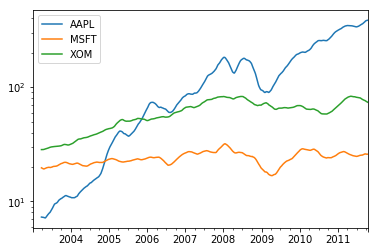

In [54]:
close_px.rolling(60).mean().plot(logy=True) # Use log scaling on y axis

                  AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
...                ...        ...        ...
2011-10-10  392.250000  25.788750  72.693750
2011-10-11  392.722941  25.860000  72.904118
2011-10-12  392.167647  25.845294  73.107647
2011-10-13  391.872353  25.857059  73.246471
2011-10-14  392.452353  25.932353  73.607647

[2292 rows x 3 columns]
